In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#載入資料載入資料
df = pd.read_csv('/content/drive/MyDrive/1112DL作業/Titanic_assignment_data_26.csv')
#df = pd.read_csv('/content/drive/MyDrive/1112DL_課堂/Titanic_demo_1.csv')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,female,NaN,1,0,15.5000,Q,yes
1,1,male,35.0,0,0,26.2875,S,yes
2,3,male,27.0,0,0,8.6625,S,no
3,3,female,NaN,0,0,7.7500,Q,no
4,1,female,35.0,0,0,211.5000,C,yes
...,...,...,...,...,...,...,...,...
1042,2,male,27.0,0,0,13.0000,S,no
1043,3,male,19.0,0,0,6.7500,Q,no
1044,3,female,22.0,0,0,9.8375,S,no
1045,1,female,31.0,0,2,164.8667,S,yes


# **資料前處理**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   int64  
 1   Sex       1047 non-null   object 
 2   Age       801 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 65.6+ KB


In [6]:
df[['Pclass']] = df[['Pclass']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   object 
 1   Sex       1047 non-null   object 
 2   Age       801 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 65.6+ KB


In [14]:
df.describe().round(2)

,Age,SibSp,Parch,Fare
count,801.00,1047.00,1047.00,1046.00
mean,29.88,0.51,0.38,33.97
std,14.00,1.05,0.84,51.97
min,1.00,0.00,0.00,0.00
25%,21.00,0.00,0.00,7.90
50%,28.00,0.00,0.00,14.46
75%,39.00,1.00,0.00,31.63
max,80.00,8.00,9.00,512.33


In [8]:
df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1047,1047,801.000000,1047.000000,1047.000000,1046.000000,1047,1047
unique,3,2,NaN,NaN,NaN,NaN,3,2
top,3,male,NaN,NaN,NaN,NaN,S,no
freq,571,671,NaN,NaN,NaN,NaN,725,647
mean,NaN,NaN,29.877653,0.507163,0.379179,33.967204,NaN,NaN
std,NaN,NaN,13.995893,1.052038,0.836812,51.965341,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,NaN,NaN,28.000000,0.000000,0.000000,14.458300,NaN,NaN
75%,NaN,NaN,39.000000,1.000000,0.000000,31.634400,NaN,NaN


In [9]:
print(df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Survived']].value_counts(sort=True))

Pclass
3         571
1         267
2         209
dtype: int64
+-----------------------+
Sex   
male      671
female    376
dtype: int64
+-----------------------+
Embarked
S           725
C           225
Q            97
dtype: int64
+-----------------------+
Survived
no          647
yes         400
dtype: int64


In [10]:
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
1,1,male,35.0,0,0,26.2875,S,yes
2,3,male,27.0,0,0,8.6625,S,no
4,1,female,35.0,0,0,211.5000,C,yes
6,2,male,26.0,0,0,13.0000,S,no
7,2,male,23.0,0,0,13.0000,S,no
...,...,...,...,...,...,...,...,...
1041,3,female,29.0,0,2,15.2458,C,yes
1042,2,male,27.0,0,0,13.0000,S,no
1043,3,male,19.0,0,0,6.7500,Q,no
1044,3,female,22.0,0,0,9.8375,S,no


In [11]:
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         376
1         236
2         189
dtype: int64
+-----------------------+
Sex   
male      496
female    305
dtype: int64
+-----------------------+
Embarked
S           601
C           166
Q            34
dtype: int64
+-----------------------+
Survived
no          480
yes         321
dtype: int64


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 1045
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    801 non-null    object 
 1   Sex       801 non-null    object 
 2   Age       801 non-null    float64
 3   SibSp     801 non-null    int64  
 4   Parch     801 non-null    int64  
 5   Fare      801 non-null    float64
 6   Embarked  801 non-null    object 
 7   Survived  801 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 56.3+ KB


In [13]:
new_df.describe().round(2)

,Age,SibSp,Parch,Fare
count,801.00,801.00,801.00,801.00
mean,29.88,0.50,0.42,38.34
std,14.00,0.87,0.84,56.88
min,1.00,0.00,0.00,0.00
25%,21.00,0.00,0.00,8.05
50%,28.00,0.00,0.00,16.10
75%,39.00,1.00,1.00,39.69
max,80.00,5.00,6.00,512.33


In [15]:
new_df.to_csv('Titanic_homework_nonNA.csv',index=False, header=True)

# **Dummies**

In [16]:
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
1,35.0,0,0,26.2875,1,0,0,0,1,0,0,1,0,1
2,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,1,0
4,35.0,0,0,211.5000,1,0,0,1,0,1,0,0,0,1
6,26.0,0,0,13.0000,0,1,0,0,1,0,0,1,1,0
7,23.0,0,0,13.0000,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,29.0,0,2,15.2458,0,0,1,1,0,1,0,0,0,1
1042,27.0,0,0,13.0000,0,1,0,0,1,0,0,1,1,0
1043,19.0,0,0,6.7500,0,0,1,0,1,0,1,0,1,0
1044,22.0,0,0,9.8375,0,0,1,1,0,0,0,1,1,0


In [17]:
dummied_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 1045
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           801 non-null    float64
 1   SibSp         801 non-null    int64  
 2   Parch         801 non-null    int64  
 3   Fare          801 non-null    float64
 4   Pclass_1      801 non-null    uint8  
 5   Pclass_2      801 non-null    uint8  
 6   Pclass_3      801 non-null    uint8  
 7   Sex_female    801 non-null    uint8  
 8   Sex_male      801 non-null    uint8  
 9   Embarked_C    801 non-null    uint8  
 10  Embarked_Q    801 non-null    uint8  
 11  Embarked_S    801 non-null    uint8  
 12  Survived_no   801 non-null    uint8  
 13  Survived_yes  801 non-null    uint8  
dtypes: float64(2), int64(2), uint8(10)
memory usage: 39.1 KB


In [18]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head().round(4)

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.4304,0.0,0.0,0.0513,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.3291,0.0,0.0,0.0169,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.4304,0.0,0.0,0.4128,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.3165,0.0,0.0,0.0254,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.2785,0.0,0.0,0.0254,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [19]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           801 non-null    float64
 1   SibsSp        801 non-null    float64
 2   Parch         801 non-null    float64
 3   Fare          801 non-null    float64
 4   Pclass_1      801 non-null    float64
 5   Pclass_2      801 non-null    float64
 6   Pclass_3      801 non-null    float64
 7   Sex_female    801 non-null    float64
 8   Sex_male      801 non-null    float64
 9   Embarked_C    801 non-null    float64
 10  Embarked_Q    801 non-null    float64
 11  Embarked_S    801 non-null    float64
 12  Survived_no   801 non-null    float64
 13  Survived_yes  801 non-null    float64
dtypes: float64(14)
memory usage: 87.7 KB


# **設定目標**

In [20]:
x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy()

y=scaled_data['Survived_yes'].copy()
y=y.astype(int)
#y

# **切割訓練集與測試集**

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [22]:
from collections import Counter
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({0: 376, 1: 264})
------------------------------------
y_test : Counter({0: 104, 1: 57})


In [23]:
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 12


# **Creating Net**

In [24]:
for learning_rate in [0.03, 0.06]:
  for momentum in [0.2, 0.4, 0.6]:
    clear.clear_session()
    model=Sequential()
    model.add(Dense(units=24, input_dim=12, activation='relu'))
    model.add(Dense(units=48, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    opt=SGD(learning_rate=learning_rate,momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    print("----------------learning_rate:", learning_rate)
    print("----------------momentum:", momentum)
    for seed in [10, 20, 30]:
      print("-------------------seed:", seed)
      x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=seed)
      history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))
      print("----------------------------------------")


----------------learning_rate: 0.03
----------------momentum: 0.2
-------------------seed: 10
Epoch 1/100
8/8 [==============================] - 4s 57ms/step - loss: 0.7050 - accuracy: 0.4453 - val_loss: 0.6906 - val_accuracy: 0.4609
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6727 - accuracy: 0.6621 - val_loss: 0.6671 - val_accuracy: 0.6406
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6495 - accuracy: 0.6680 - val_loss: 0.6511 - val_accuracy: 0.6328
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6326 - accuracy: 0.6660 - val_loss: 0.6406 - val_accuracy: 0.6172
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6206 - accuracy: 0.6660 - val_loss: 0.6326 - val_accuracy: 0.6094
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6109 - accuracy: 0.6836 - val_loss: 0.6260 - val_accuracy: 0.6250
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 

In [25]:
for momentum in [0.2, 0.4, 0.6]:
  clear.clear_session()
  model=Sequential()
  model.add(Dense(units=24, input_dim=12, activation='relu'))
  model.add(Dense(units=48, activation='relu'))
  model.add(Dense(units=1, activation='sigmoid'))

  opt=SGD(learning_rate=0.09, momentum=momentum)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  print("----------------learning_rate:0.09")
  print("----------------momentum:", momentum)
  for seed in [10, 20, 30]:
    print("-------------------seed:", seed)
    x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=seed)
    history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))
    print("----------------------------------------")

----------------learning_rate:0.09
----------------momentum: 0.2
-------------------seed: 10
Epoch 1/100
8/8 [==============================] - 0s 25ms/step - loss: 0.6903 - accuracy: 0.5117 - val_loss: 0.6671 - val_accuracy: 0.6094
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6447 - accuracy: 0.6484 - val_loss: 0.6391 - val_accuracy: 0.6094
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6131 - accuracy: 0.6992 - val_loss: 0.6149 - val_accuracy: 0.6641
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.5846 - accuracy: 0.7520 - val_loss: 0.5969 - val_accuracy: 0.7188
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5627 - accuracy: 0.7617 - val_loss: 0.5838 - val_accuracy: 0.7109
Epoch 6/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5459 - accuracy: 0.7578 - val_loss: 0.5767 - val_accuracy: 0.7109
Epoch 7/100
8/8 [==============================] - 0s 28ms/step - los

In [26]:
clear.clear_session()
model=Sequential()
model.add(Dense(units=24, input_dim=12, activation='relu'))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

opt=SGD(learning_rate=0.06, momentum=0.6)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print("----------------learning_rate:0.06")
print("----------------momentum:0.6")

print("-------------------seed:30")
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=30)
history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))
print("----------------------------------------")

----------------learning_rate:0.06
----------------momentum:0.6
-------------------seed:30
Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 0.6943 - accuracy: 0.5996 - val_loss: 0.6836 - val_accuracy: 0.6172
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6575 - accuracy: 0.6484 - val_loss: 0.6429 - val_accuracy: 0.6250
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6240 - accuracy: 0.7051 - val_loss: 0.6076 - val_accuracy: 0.7109
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5957 - accuracy: 0.7246 - val_loss: 0.5763 - val_accuracy: 0.7500
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5735 - accuracy: 0.7246 - val_loss: 0.5499 - val_accuracy: 0.7578
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5583 - accuracy: 0.7266 - val_loss: 0.5293 - val_accuracy: 0.7578
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5

In [27]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

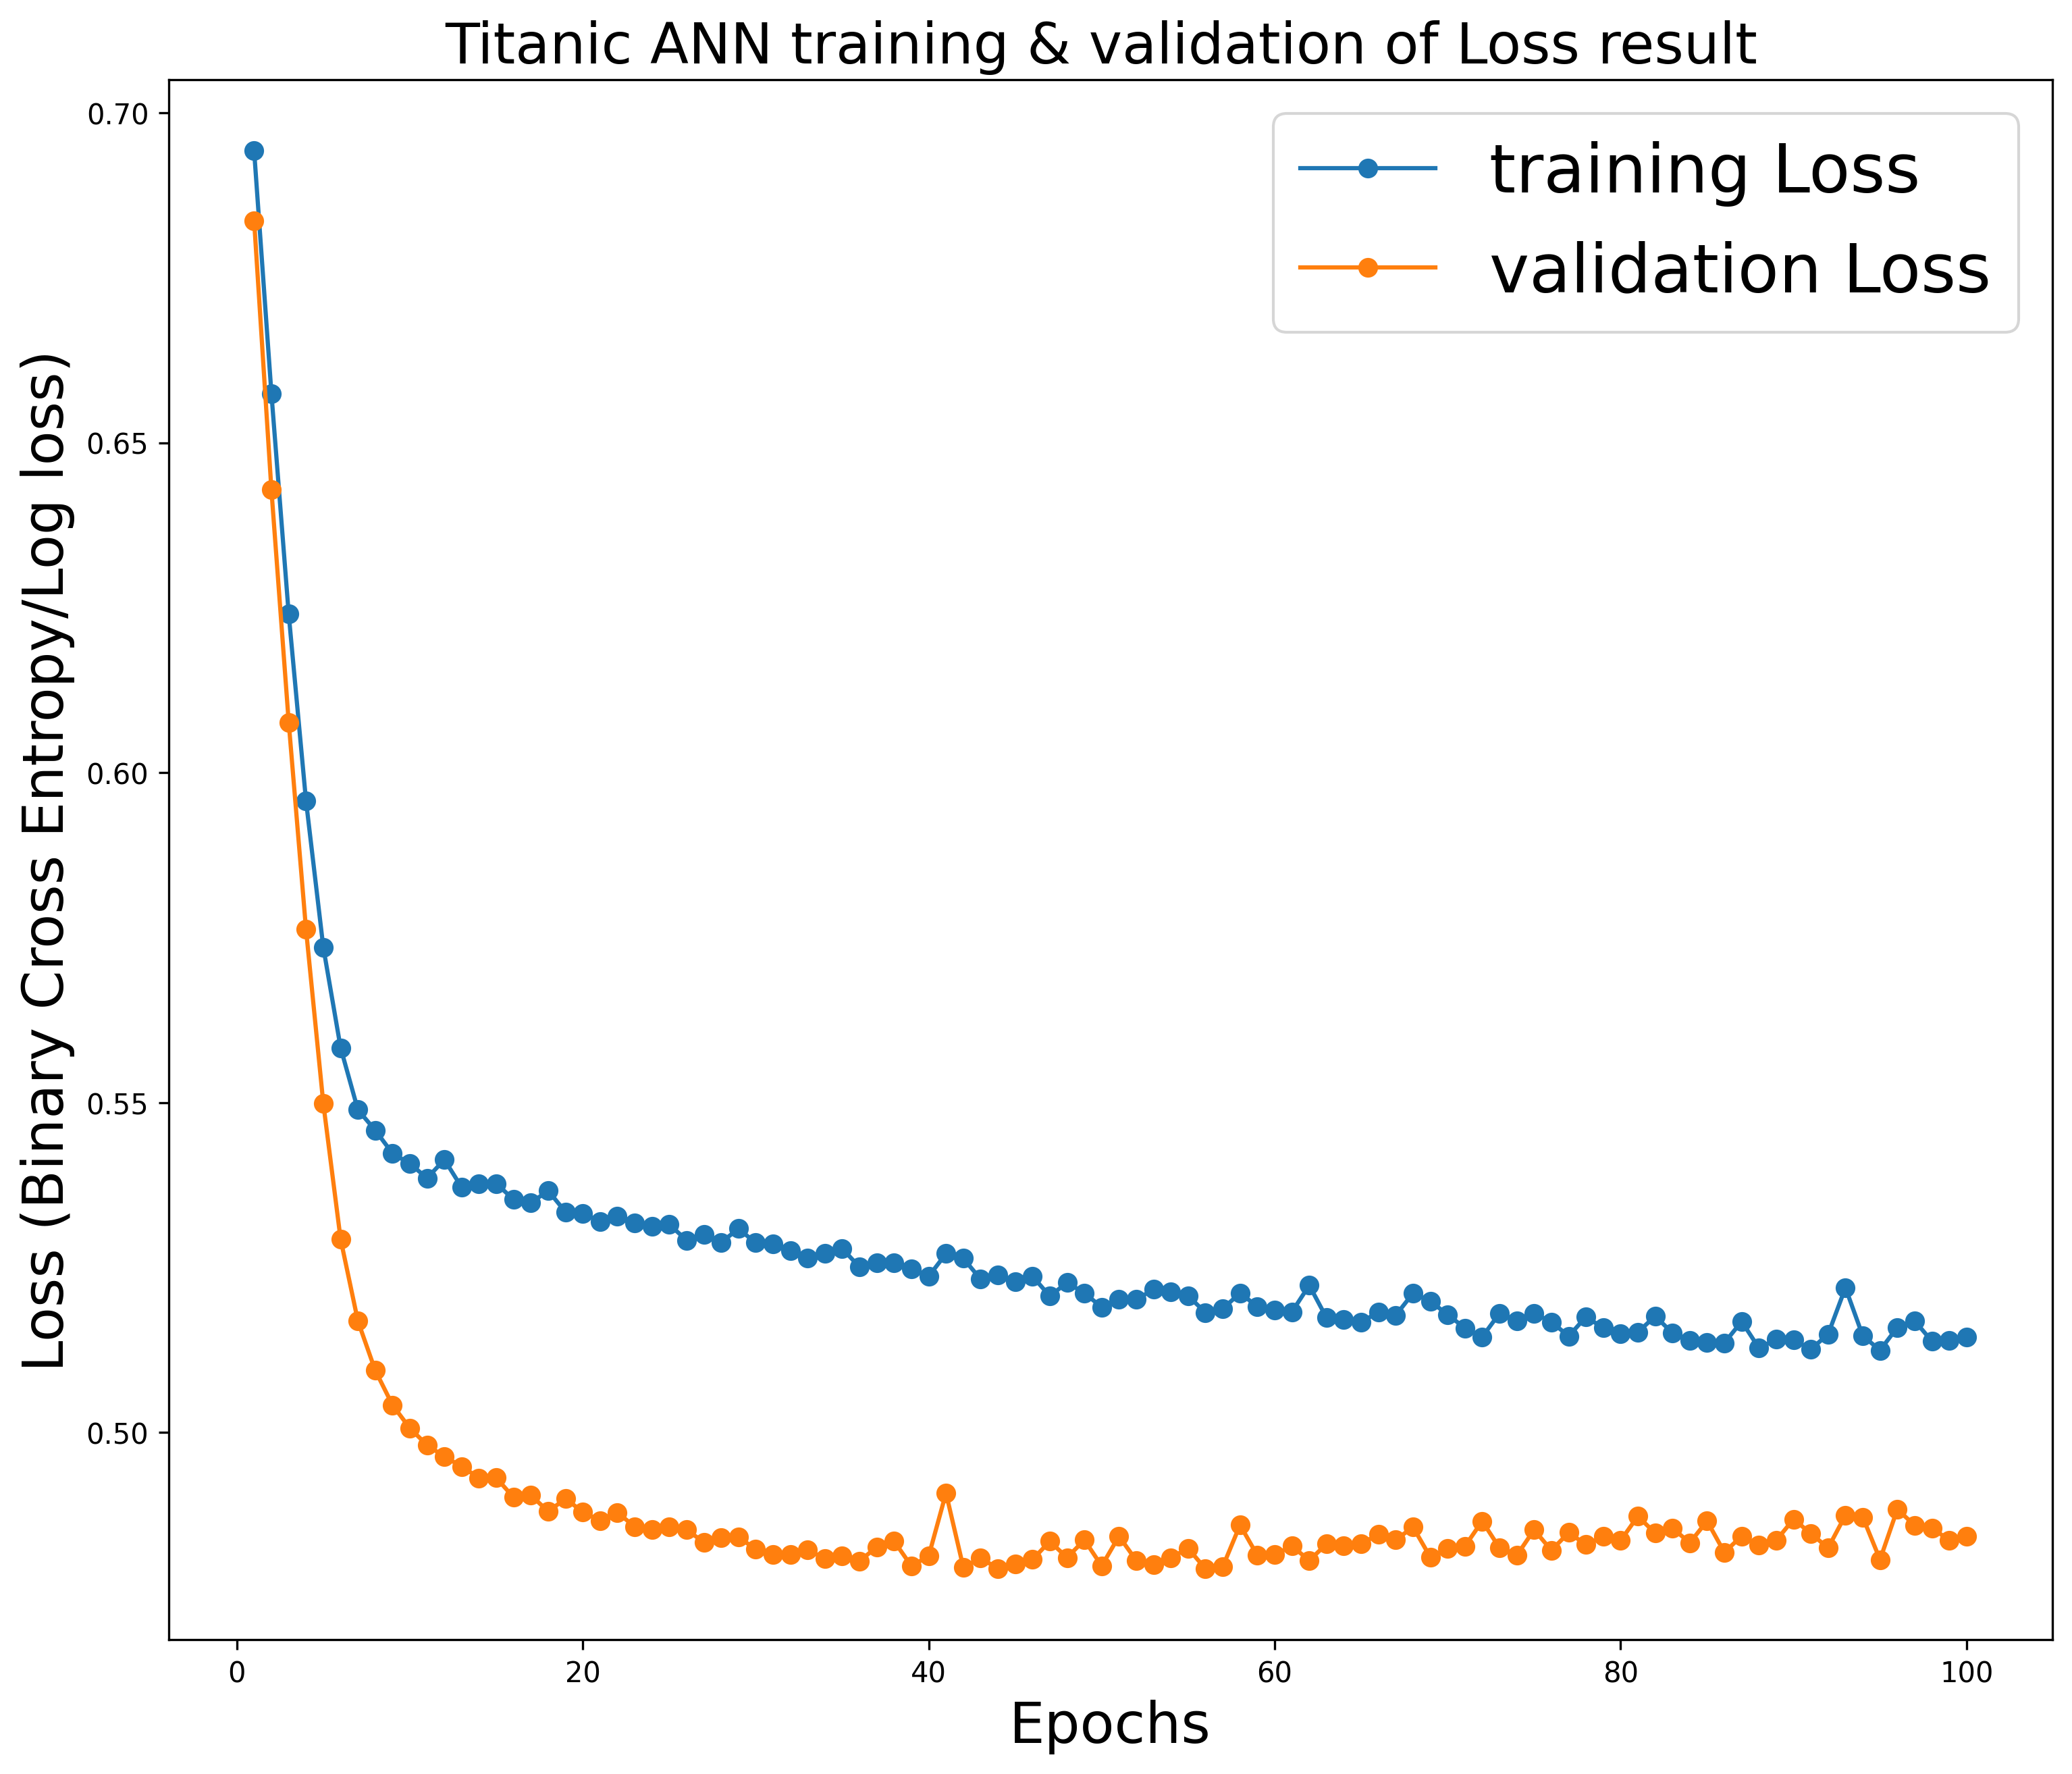

In [28]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Binary Cross Entropy/Log loss)',fontsize=20)
plt.title('Titanic ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

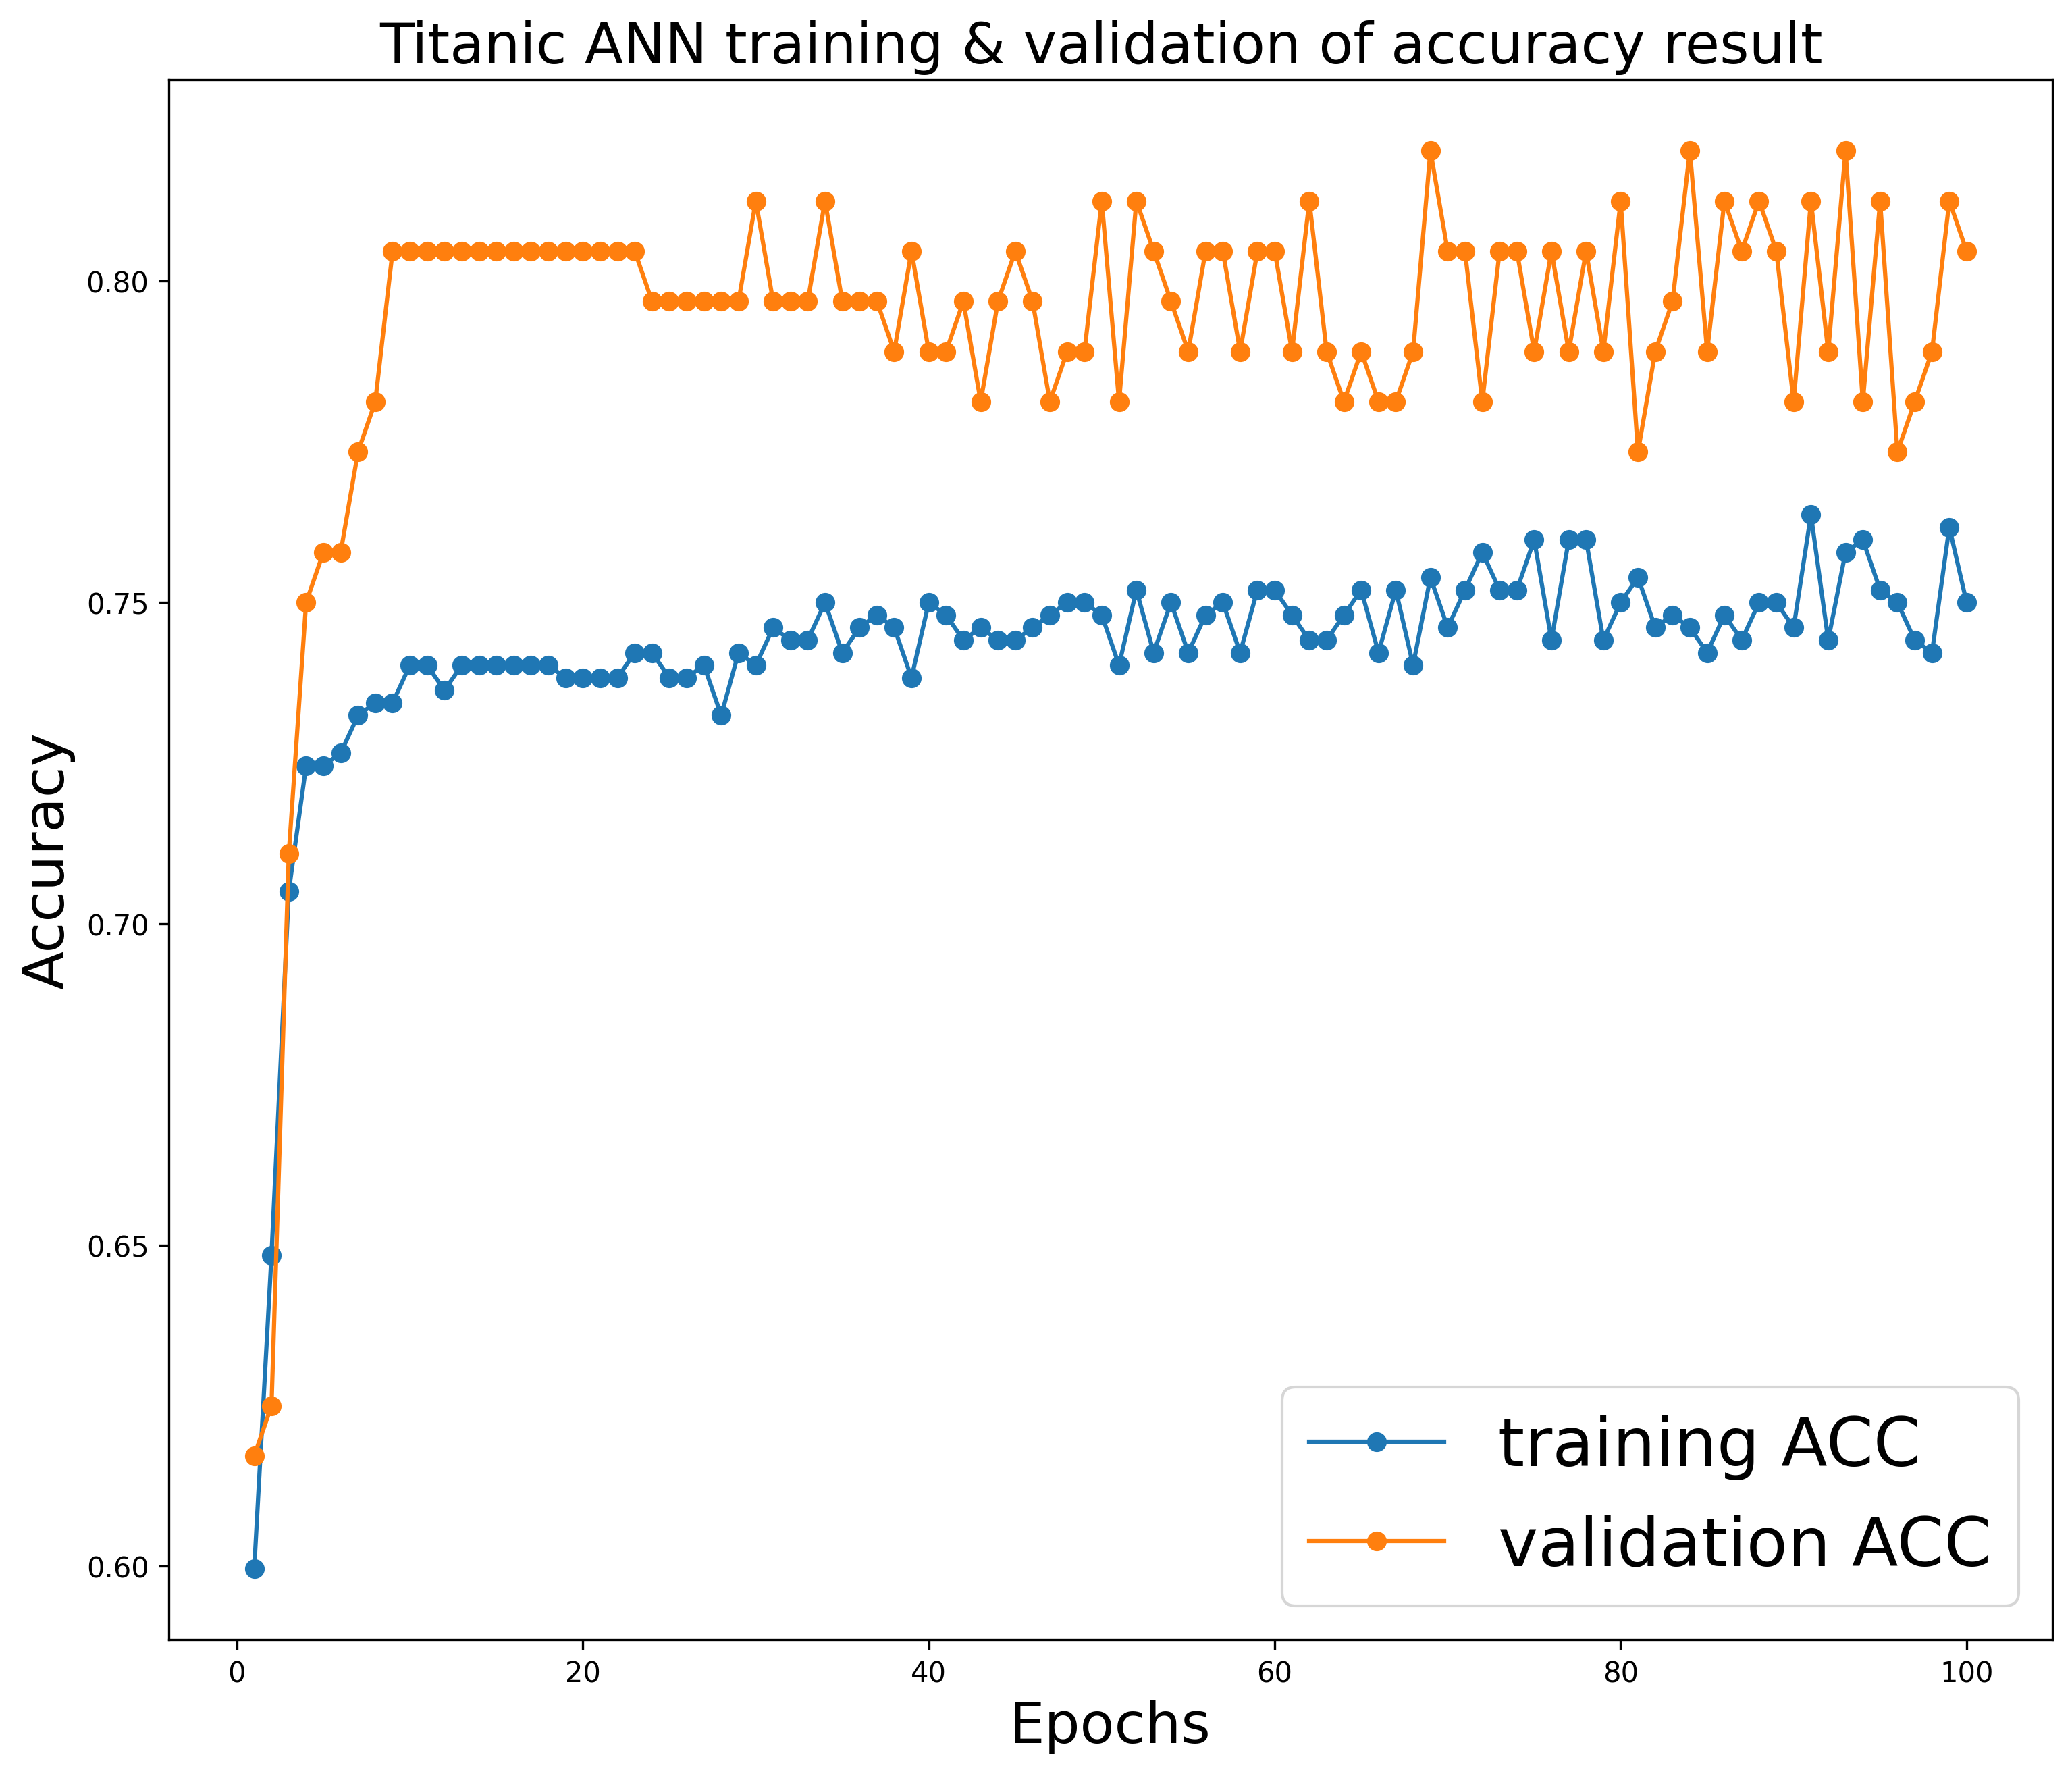

In [29]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

# ***最終結果***

In [30]:
print("----------------learing_rate:0.06")
print("----------------momentum:0.6")
clear.clear_session()
ANN_model=Sequential()
ANN_model.add(Dense(units=24, input_dim=12, activation='relu'))
ANN_model.add(Dense(units=48, activation='relu'))
ANN_model.add(Dense(units=1, activation='sigmoid'))

opt=SGD(learning_rate=0.06,momentum=0.6)
ANN_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history=ANN_model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1)

----------------learing_rate:0.06
----------------momentum:0.6
Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.4902
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5840
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.5996
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.6816
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.6934
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7266
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7324
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7324
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.7324
Epoch 10/100
8/8 [==============================] - 0s 3ms/step 

In [31]:
prediction=ANN_model.predict_on_batch(x_test)
prediction

array([[0.53047687],
       [0.6105676 ],
       [0.7085469 ],
       [0.23184791],
       [0.50246245],
       [0.12043558],
       [0.37975544],
       [0.46643865],
       [0.3946065 ],
       [0.10987462],
       [0.26726404],
       [0.908304  ],
       [0.30711856],
       [0.5780257 ],
       [0.1081081 ],
       [0.11086812],
       [0.32134348],
       [0.13236363],
       [0.68498814],
       [0.12628923],
       [0.17718802],
       [0.3169144 ],
       [0.16814968],
       [0.83384097],
       [0.10306914],
       [0.12293971],
       [0.48846644],
       [0.14264967],
       [0.201941  ],
       [0.21478115],
       [0.52531886],
       [0.16967207],
       [0.72033626],
       [0.22631134],
       [0.5426787 ],
       [0.8336476 ],
       [0.10202775],
       [0.17581803],
       [0.18272704],
       [0.7529447 ],
       [0.51814455],
       [0.61474097],
       [0.51242393],
       [0.25824344],
       [0.18437497],
       [0.22280347],
       [0.21594304],
       [0.834

In [32]:
testing_prediction=(ANN_model.predict_on_batch(x_test) >= 0.5).astype('int')
testing_prediction

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [33]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 68.94
Testing f1s: 55.36
Testing pre: 56.36
Testing sen: 54.39
Testing spe: 76.92

Testing confusion matrix:
[[80 24]
 [26 31]]


In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

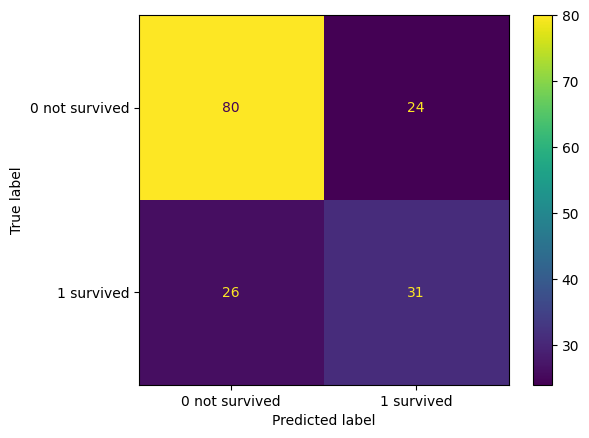

In [35]:
display_plot = ConfusionMatrixDisplay(confusion_matrix=testing_cm, display_labels=["0 not survived","1 survived"])
display_plot.plot()
plt.show()


# **Logistic** **Regression**

In [36]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

logistic_model = linear_model.LogisticRegression(random_state=10)
logistic_model.fit(x_train, y_train)

CV3F_SVM_acc=cross_val_score(logistic_model,x_train,y_train,cv=3,scoring='accuracy')

#print reault
print('Training result')
print('Each fold ACC:',CV3F_SVM_acc)
print('Average ACC:',round((np.mean(CV3F_SVM_acc))*100,2),'+/-',round((np.std(CV3F_SVM_acc))*100,2))

Training result
Each fold ACC: [0.73364486 0.72300469 0.78403756]
Average ACC: 74.69 +/- 2.66


In [37]:
# 6.2 Show result: out-of-sample testing
# Training result
training_prediction=logistic_model.predict(x_train)
# Accuracy
training_acc=accuracy_score(y_train,training_prediction)
# f1 score
training_f1s=f1_score(y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(y_train,training_prediction)

# Testing result
testing_prediction=logistic_model.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print("########6.2 Show result: out-of-sample testing############")
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)
print()

########6.2 Show result: out-of-sample testing############
Training result:
Training ACC: 75.94
Training f1s: 70.04
Training pre: 72.0
Training sen: 68.18
Training spe: 81.38

Training confusion matrix:
[[306  70]
 [ 84 180]]
+-----------------------------------------+
Testing result:
Testing ACC: 70.19
Testing f1s: 57.14
Testing pre: 58.18
Testing sen: 56.14
Testing spe: 77.88

Testing confusion matrix:
[[81 23]
 [25 32]]



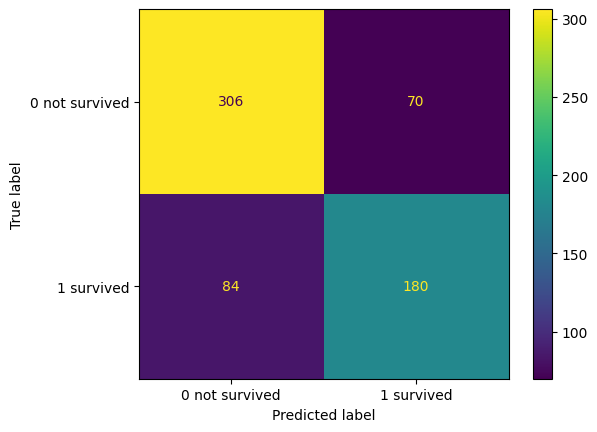

In [38]:
display_plot = ConfusionMatrixDisplay(confusion_matrix=training_cm, display_labels=["0 not survived","1 survived"])
display_plot.plot()
plt.show()

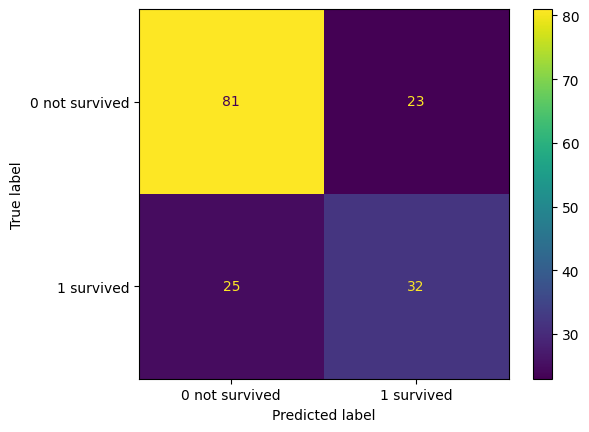

In [39]:
display_plot = ConfusionMatrixDisplay(confusion_matrix=testing_cm, display_labels=["0 not survived","1 survived"])
display_plot.plot()
plt.show()